In [29]:
import pandas as pd
import numpy as np

In [30]:
d= pd.read_csv(r"C:\Users\HariHaraSudhan\Documents\palo_intern\carrer-intelligence\data\employee.csv")

In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [32]:
d = d[d["Age"] >= 18]
d = d[d["YearsAtCompany"] <= d["TotalWorkingYears"]]
d = d[d["YearsSinceLastPromotion"] <= d["YearsAtCompany"]]
d = d[d["YearsInCurrentRole"] <= d["YearsAtCompany"]]


In [33]:
# Avoid division by zero
d= d[d["YearsAtCompany"] > 0]

# Promotion Gap Ratio
d["PromotionGapRatio"] = (
    d["YearsSinceLastPromotion"] / d["YearsAtCompany"]
)

# Role Stagnation Index
d["RoleStagnationIndex"] = (
    d["YearsInCurrentRole"] / d["YearsAtCompany"]
)

# Training Intensity Score
d["TrainingIntensityScore"] = (
    d["TrainingTimesLastYear"] / d["YearsAtCompany"]
)

# Manager Stability Indicator
d["ManagerStability"] = (
    d["YearsWithCurrManager"] / d["YearsAtCompany"]
)

# View new columns
d[[
    "PromotionGapRatio",
    "RoleStagnationIndex",
    "TrainingIntensityScore",
    "ManagerStability"
]].head()


,PromotionGapRatio,RoleStagnationIndex,TrainingIntensityScore,ManagerStability
0,0.000000,0.666667,0.000000,0.833333
1,0.100000,0.700000,0.300000,0.700000
3,0.375000,0.875000,0.375000,0.000000
4,1.000000,1.000000,1.500000,1.000000
5,0.428571,1.000000,0.285714,0.857143


In [34]:
d.to_csv("../data/employee_features.csv", index=False)

In [35]:
from sklearn.preprocessing import StandardScaler
d= pd.read_csv("../data/employee_features.csv")

features = [
    "PromotionGapRatio",
    "RoleStagnationIndex",
    "TrainingIntensityScore",
    "ManagerStability",
    "YearsAtCompany",
    "JobLevel"
]
X = d[features]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape of clustering dataset:", X_scaled.shape)

Shape of clustering dataset: (1426, 6)


In [37]:
import numpy as np

np.save("../data/X_scaled.npy", X_scaled)

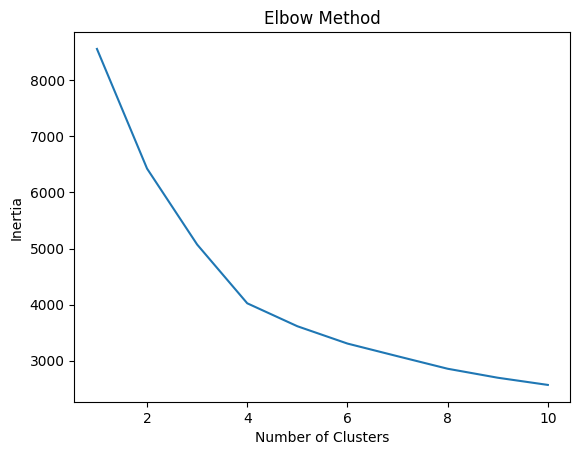

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
d["CareerCluster"] = kmeans.fit_predict(X_scaled)
print(d["CareerCluster"].value_counts())
cluster_summary = d.groupby("CareerCluster")[features].mean()
print(cluster_summary)
d.to_csv("../data/employee_clustered.csv", index=False)


CareerCluster
0    793
2    303
1    179
3    151
Name: count, dtype: int64
               PromotionGapRatio  RoleStagnationIndex  TrainingIntensityScore  \
CareerCluster                                                                   
0                       0.124954             0.635418                0.554655   
1                       0.338781             0.496132                0.177882   
2                       0.833587             0.816136                0.738798   
3                       0.094923             0.066225                3.052980   

               ManagerStability  YearsAtCompany  JobLevel  
CareerCluster                                              
0                      0.627955        6.252207  1.810845  
1                      0.456860       18.988827  3.865922  
2                      0.790209        5.910891  1.947195  
3                      0.013245        1.019868  1.649007  


In [40]:
def assign_risk(row):
    if row["PromotionGapRatio"] > 0.7 and row["RoleStagnationIndex"] > 0.7:
        return "High"
    elif row["PromotionGapRatio"] > 0.4:
        return "Medium"
    else:
        return "Low"

d["PromotionGapRisk"] = d.apply(assign_risk, axis=1)

In [41]:
print(d["PromotionGapRisk"].value_counts())

PromotionGapRisk
Low       1009
Medium     229
High       188
Name: count, dtype: int64


In [42]:
d.to_csv("../data/employee_scored.csv", index=False)

In [43]:
print(d.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PromotionGapRatio',
       'RoleStagnationIndex', 'TrainingIntensityScore', 'ManagerStability',
       'CareerCluster', 'PromotionGapRisk'],
      dtype='object')


In [45]:
cluster_labels = {
    0: "Stable Contributors",
    1: "Senior Long-Term Leaders",
    2: "Promotion-Stalled Employees",
    3: "Early-Career Fast Movers"
}

d["CareerClusterLabel"] = d["CareerCluster"].map(cluster_labels)
print(d.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PromotionGapRatio',
       'RoleStagnationIndex', 'TrainingIntensityScore', 'ManagerStability',
       'CareerCluster', 'PromotionGapRisk', 'CareerClusterLabel'],
      dtype='object')


In [48]:
retention_d = retention_d.copy()

retention_d["RetentionOpportunityIndex"] = retention_d["PromotionGapRisk"].map({
    "High": 3,
    "Medium": 2,
    "Low": 1
})

print(retention_d["RetentionOpportunityIndex"].value_counts())

RetentionOpportunityIndex
2    185
3    154
Name: count, dtype: int64


In [49]:
retention_d["Department"].value_counts()

Department
Research & Development    222
Sales                     103
Human Resources            14
Name: count, dtype: int64

In [50]:
retention_d["JobRole"].value_counts().head(10)

JobRole
Sales Executive              72
Research Scientist           58
Laboratory Technician        51
Manager                      39
Healthcare Representative    35
Manufacturing Director       34
Sales Representative         21
Research Director            19
Human Resources              10
Name: count, dtype: int64

In [51]:
retention_d["YearsSinceLastPromotion"].mean()

np.float64(5.799410029498525)

In [57]:
d["RetentionOpportunityIndex"] = 0

d.loc[
    (d["Attrition"] == 0) &
    (d["PromotionGapRisk"].isin(["Medium", "High"])) &
    (d["PerformanceRating"] >= 3),
    "RetentionOpportunityIndex"
] = d["PromotionGapRisk"].map({
    "High": 3,
    "Medium": 2
})
print(d["RetentionOpportunityIndex"].value_counts())

RetentionOpportunityIndex
0    1087
2     185
3     154
Name: count, dtype: int64


In [59]:
d.to_csv("../data/final_career_intelligence.csv", index=False)